Saving Weather Data Set.csv to Weather Data Set (10).csv
Original Train Distribution:
 RainTomorrow
0    0.78085
1    0.21915
Name: proportion, dtype: float64


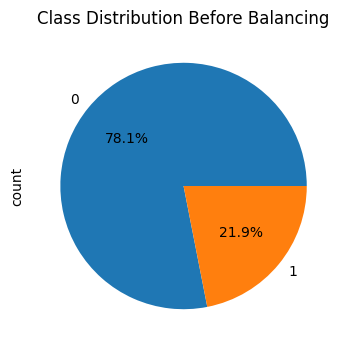

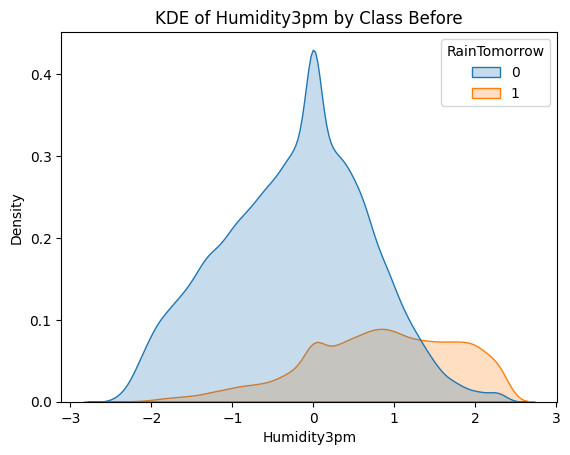

Balanced Train Distribution:
 RainTomorrow
0    0.5
1    0.5
Name: proportion, dtype: float64


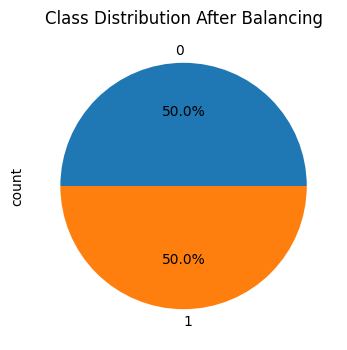

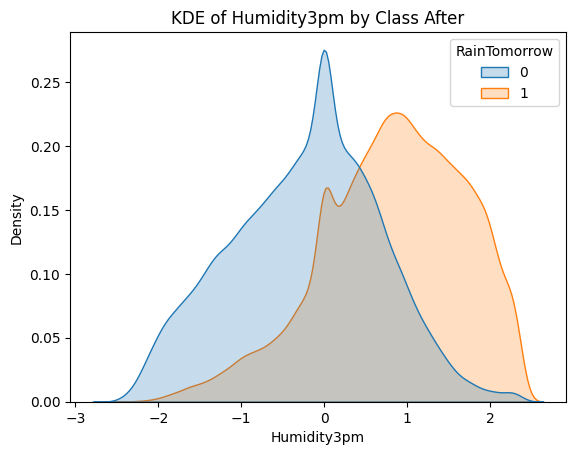

Balancing completed. Files saved:
- balanced_train.csv
- test_features.csv
- test_labels.csv


In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

#Upload dataset
from google.colab import files
uploaded = files.upload()

# Load the data
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Split to apply SMOTE only on train (good practice)
if 'RainTomorrow' in df.columns:
    X = df.drop('RainTomorrow', axis=1)
    y = df['RainTomorrow']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # EDA: Original imbalance
    print("Original Train Distribution:\n", y_train.value_counts(normalize=True))

    # Visualizations before
    plt.figure(figsize=(6, 4))
    y_train.value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Class Distribution Before Balancing')
    plt.show()

    if 'Humidity3pm' in X.columns:
        temp_df = pd.concat([X_train, y_train], axis=1)
        sns.kdeplot(data=temp_df, x='Humidity3pm', hue='RainTomorrow', fill=True)
        plt.title('KDE of Humidity3pm by Class Before')
        plt.show()

    # Preprocessing: Balancing with SMOTE (on train)
    smote = SMOTE(sampling_strategy='auto', random_state=42)  # Auto for 50:50
    X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

    # EDA after: Confirm 50:50
    print("Balanced Train Distribution:\n", y_train_bal.value_counts(normalize=True))

    # Visualizations after
    plt.figure(figsize=(6, 4))
    y_train_bal.value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Class Distribution After Balancing')
    plt.show()

    # Recombine for viz (temp df)
    df_bal = pd.concat([X_train_bal, y_train_bal], axis=1)
    if 'Humidity3pm' in df_bal.columns:
        sns.kdeplot(data=df_bal, x='Humidity3pm', hue='RainTomorrow', fill=True)
        plt.title('KDE of Humidity3pm by Class After')
        plt.show()

    # Save balanced train/test if needed
    pd.concat([X_train_bal, y_train_bal], axis=1).to_csv('balanced_train.csv', index=False)
    X_test.to_csv('test_features.csv', index=False)
    y_test.to_csv('test_labels.csv', index=False)

    print("Balancing completed. Files saved:")
    print("- balanced_train.csv")
    print("- test_features.csv")
    print("- test_labels.csv")
else:
    print("RainTomorrow column not found. Please check the dataset.")